In [8]:
# Import necessary libraries
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import spearmanr  # Importing spearmanr for statistical tests
from scipy.stats import f_oneway 

## Connect to the SQLite database

## Hypothesis 1: Higher product prices correlate with lower sales quantities

In [3]:
# Connect to the SQLite database
db_path = r'C:\Users\calua\OneDrive - Vodafone Group\Desktop\3Signet\Abc Project\ABC_pharm_db.db'
conn = sqlite3.connect(db_path)

# Hypothesis 1: Higher product prices correlate with lower sales quantities
query_price_quantity = """
SELECT p.ProductID, p.ProductName, f.Price, SUM(f.Quantity) AS TotalQuantity
FROM FactSales f
JOIN DimProduct p ON f.ProductID = p.ProductID
GROUP BY p.ProductID, p.ProductName, f.Price;
"""
df_price_quantity = pd.read_sql(query_price_quantity, conn)
correlation_price_quantity = df_price_quantity[['Price', 'TotalQuantity']].corr()
print("Correlation matrix between Price and Quantity:")
print(correlation_price_quantity)




Correlation matrix between Price and Quantity:
                  Price  TotalQuantity
Price          1.000000      -0.023991
TotalQuantity -0.023991       1.000000


## Plot the scatter plot

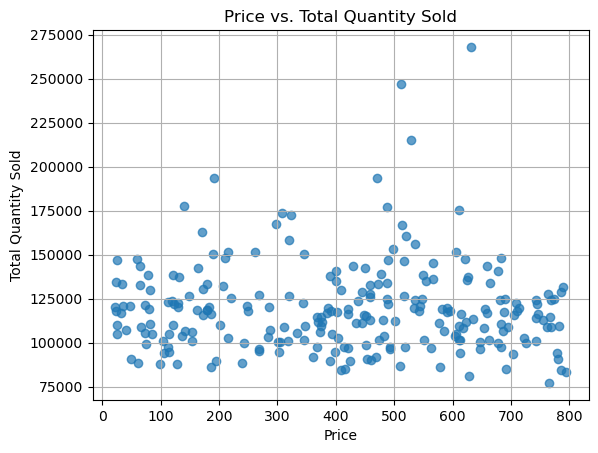


Spearman correlation coefficient: -0.047237754787861665
P-value for significance test: 0.46637473596006784

The relationship between Price and Quantity is not statistically significant.


In [6]:
# Plot the scatter plot
plt.scatter(df_price_quantity['Price'], df_price_quantity['TotalQuantity'], alpha=0.7)
plt.title("Price vs. Total Quantity Sold")
plt.xlabel("Price")
plt.ylabel("Total Quantity Sold")
plt.grid(True)
plt.show()

# Statistical Significance Test
# Spearman's rank correlation test is robust for non-linear relationships
spearman_corr, spearman_pvalue = spearmanr(df_price_quantity['Price'], df_price_quantity['TotalQuantity'])

print("\nSpearman correlation coefficient:", spearman_corr)
print("P-value for significance test:", spearman_pvalue)

# Interpretation
if spearman_pvalue < 0.05:
    print("\nThe relationship between Price and Quantity is statistically significant.")
else:
    print("\nThe relationship between Price and Quantity is not statistically significant.")


## Hypothesis 2: Sales performance varies significantly between different customer channels (Hospital vs. Pharmacy)


Sample Sales Data by Customer Channel:
    Channel  SaleAmount
0  Hospital      1472.0
1  Pharmacy      1472.0
2  Hospital      1104.0
3  Hospital       416.0
4  Pharmacy       260.0

ANOVA test results for sales by channel:
F-statistic: 4.314565343720256, p-value: 0.03778842555381452

The difference in sales performance between Hospital and Pharmacy channels is statistically significant.


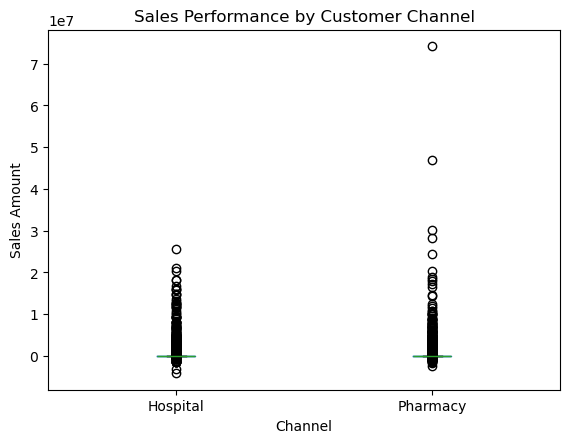

In [9]:
# Hypothesis 2: Sales performance varies significantly between different customer channels (Hospital vs. Pharmacy)
# Query: Retrieve sales data grouped by Channel
query_channel_sales = """
SELECT c.Channel, f.Sales AS SaleAmount
FROM FactSales f
JOIN DimCustomer c ON f.CustomerID = c.CustomerID;
"""
df_channel_sales = pd.read_sql(query_channel_sales, conn)

# Check data
print("\nSample Sales Data by Customer Channel:")
print(df_channel_sales.head())

# Split sales data by channel
hospital_sales = df_channel_sales[df_channel_sales['Channel'] == 'Hospital']['SaleAmount']
pharmacy_sales = df_channel_sales[df_channel_sales['Channel'] == 'Pharmacy']['SaleAmount']

# Perform ANOVA test
anova_results = f_oneway(hospital_sales, pharmacy_sales)
print("\nANOVA test results for sales by channel:")
print(f"F-statistic: {anova_results.statistic}, p-value: {anova_results.pvalue}")

# Interpretation
if anova_results.pvalue < 0.05:
    print("\nThe difference in sales performance between Hospital and Pharmacy channels is statistically significant.")
else:
    print("\nThe difference in sales performance between Hospital and Pharmacy channels is not statistically significant.")

# Visualization: Box Plot for Sales by Channel
df_channel_sales.boxplot(by='Channel', column='SaleAmount', grid=False)
plt.title("Sales Performance by Customer Channel")
plt.suptitle("")  # Suppress default title
plt.xlabel("Channel")
plt.ylabel("Sales Amount")
plt.show()


In [7]:
# Perform ANOVA test for significant differences in sales performance
anova_results = stats.f_oneway(
    df_channel_sales[df_channel_sales['Channel'] == 'Hospital']['TotalSales'],
    df_channel_sales[df_channel_sales['Channel'] == 'Pharmacy']['TotalSales']
)
print("\nANOVA test result for customer channel sales performance:")
print(anova_results)


ANOVA test result for customer channel sales performance:
F_onewayResult(statistic=nan, pvalue=nan)


C:\Users\calua\AppData\Local\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:4141: DegenerateDataWarning: all input arrays have length 1.  f_oneway requires that at least one input has length greater than 1.
  warnings.warn(stats.DegenerateDataWarning(msg))


## Hypothesis 3: Sales are higher in urban areas compared to rural areas